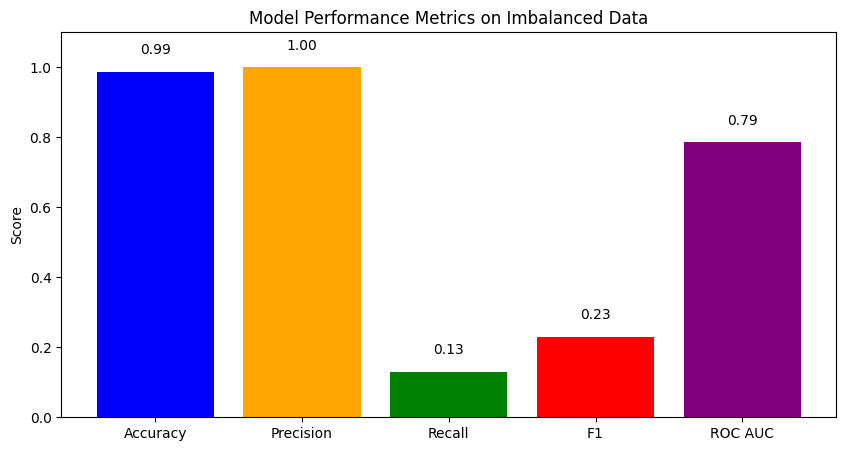

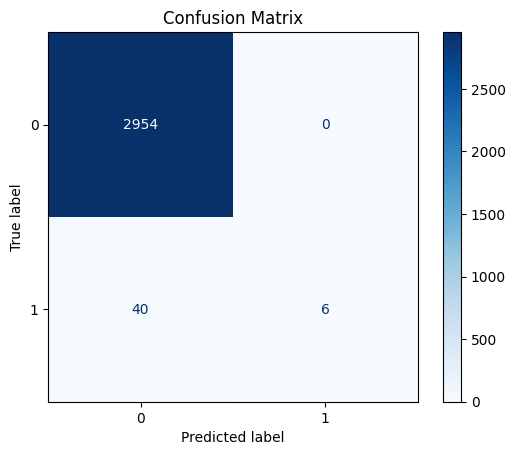

Class distribution in test set: [2954   46]


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            f1_score, roc_auc_score, confusion_matrix, 
                            ConfusionMatrixDisplay)

# Create imbalanced dataset (98:2 ratio)
X, y = make_classification(n_samples=10000, n_features=5, n_informative=3,
                           n_redundant=1, weights=[0.99], random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Calculate metrics
metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1": f1_score(y_test, y_pred),
    "ROC AUC": roc_auc_score(y_test, y_proba)
}

# Plot metrics
plt.figure(figsize=(10, 5))
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title("Model Performance Metrics on Imbalanced Data")
plt.ylim(0, 1.1)
plt.ylabel("Score")
for i, v in enumerate(metrics.values()):
    plt.text(i, v + 0.05, f"{v:.2f}", ha='center')
plt.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

print("Class distribution in test set:", np.bincount(y_test))

Original Metrics:
   Accuracy  Precision    Recall        F1   ROC AUC
0  0.986667        1.0  0.130435  0.230769  0.785243

Metrics After Random Oversampling:
   Accuracy  Precision    Recall        F1   ROC AUC
0  0.722667   0.037647  0.695652  0.071429  0.783013


/home/nnieto/Nico/Cursos/.courses/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/nnieto/Nico/Cursos/.courses/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/home/nnieto/Nico/Cursos/.courses/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


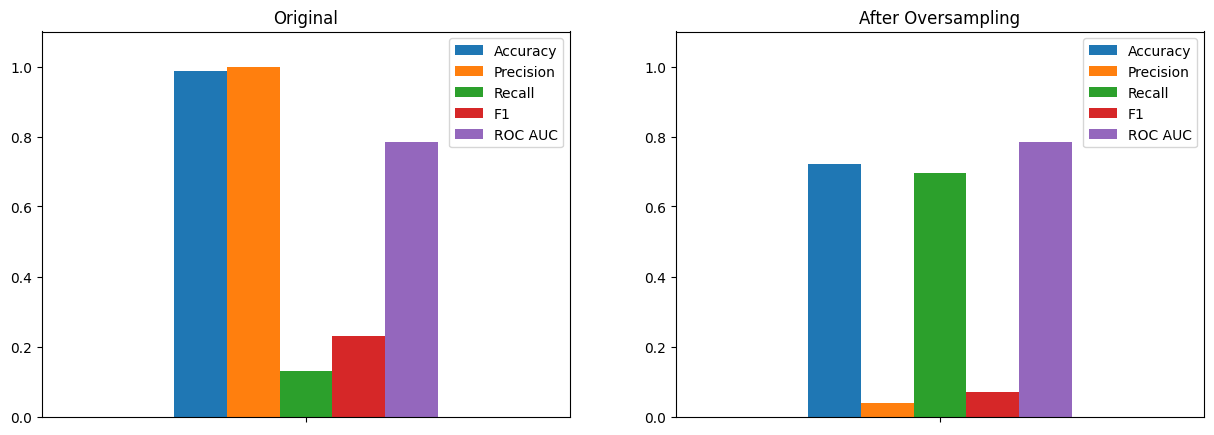

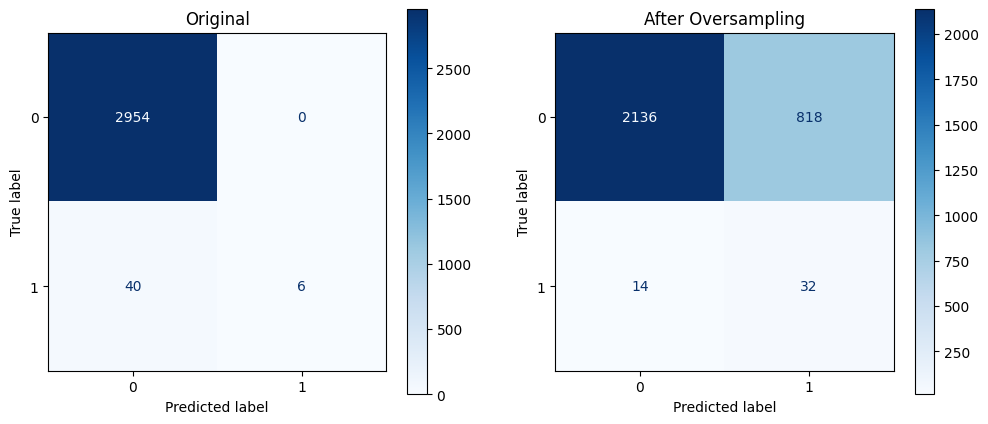

In [12]:
from imblearn.over_sampling import RandomOverSampler

# Original model metrics (from previous code)
print("Original Metrics:")
print(pd.DataFrame([metrics]))

# Random oversampling of minority class
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Train on resampled data
model_ros = LogisticRegression(max_iter=1000)
model_ros.fit(X_resampled, y_resampled)
y_pred_ros = model_ros.predict(X_test)

# Calculate metrics after resampling
metrics_ros = {
    "Accuracy": accuracy_score(y_test, y_pred_ros),
    "Precision": precision_score(y_test, y_pred_ros),
    "Recall": recall_score(y_test, y_pred_ros),
    "F1": f1_score(y_test, y_pred_ros),
    "ROC AUC": roc_auc_score(y_test, model_ros.predict_proba(X_test)[:, 1])
}

print("\nMetrics After Random Oversampling:")
print(pd.DataFrame([metrics_ros]))

# Plot comparison
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
pd.DataFrame([metrics]).plot(kind='bar', ax=ax[0], title='Original')
pd.DataFrame([metrics_ros]).plot(kind='bar', ax=ax[1], title='After Oversampling')
for a in ax:
    a.set_ylim(0, 1.1)
    a.set_xticklabels([])
plt.show()

# Confusion matrix comparison
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax[0], cmap='Blues')
ax[0].set_title('Original')
ConfusionMatrixDisplay.from_estimator(model_ros, X_test, y_test, ax=ax[1], cmap='Blues')
ax[1].set_title('After Oversampling')
plt.show()


Metrics With Class Weighting:
   Accuracy  Precision    Recall        F1   ROC AUC
0  0.722333   0.037603  0.695652  0.071349  0.783242


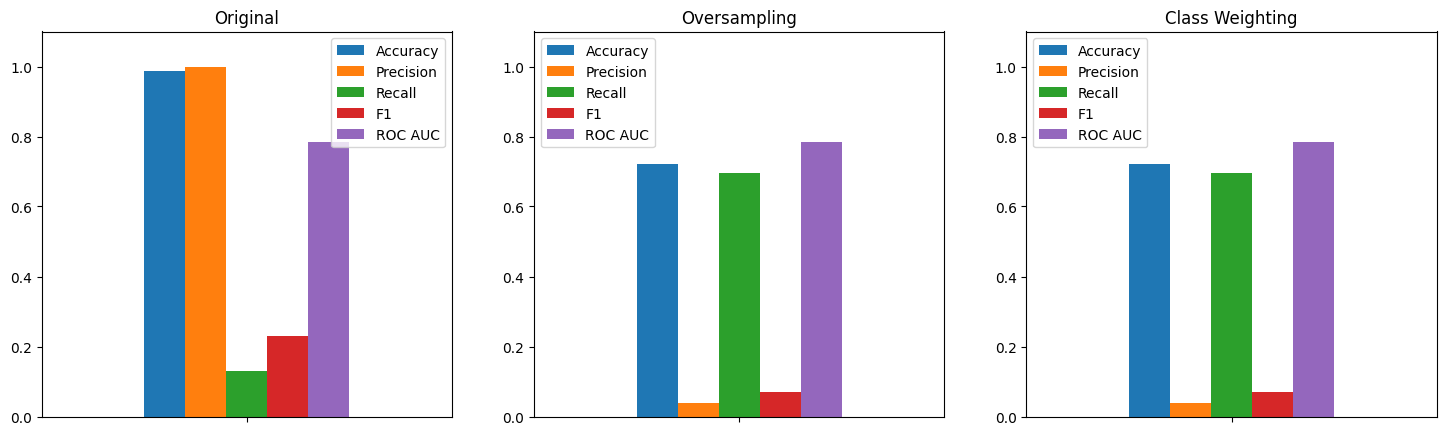

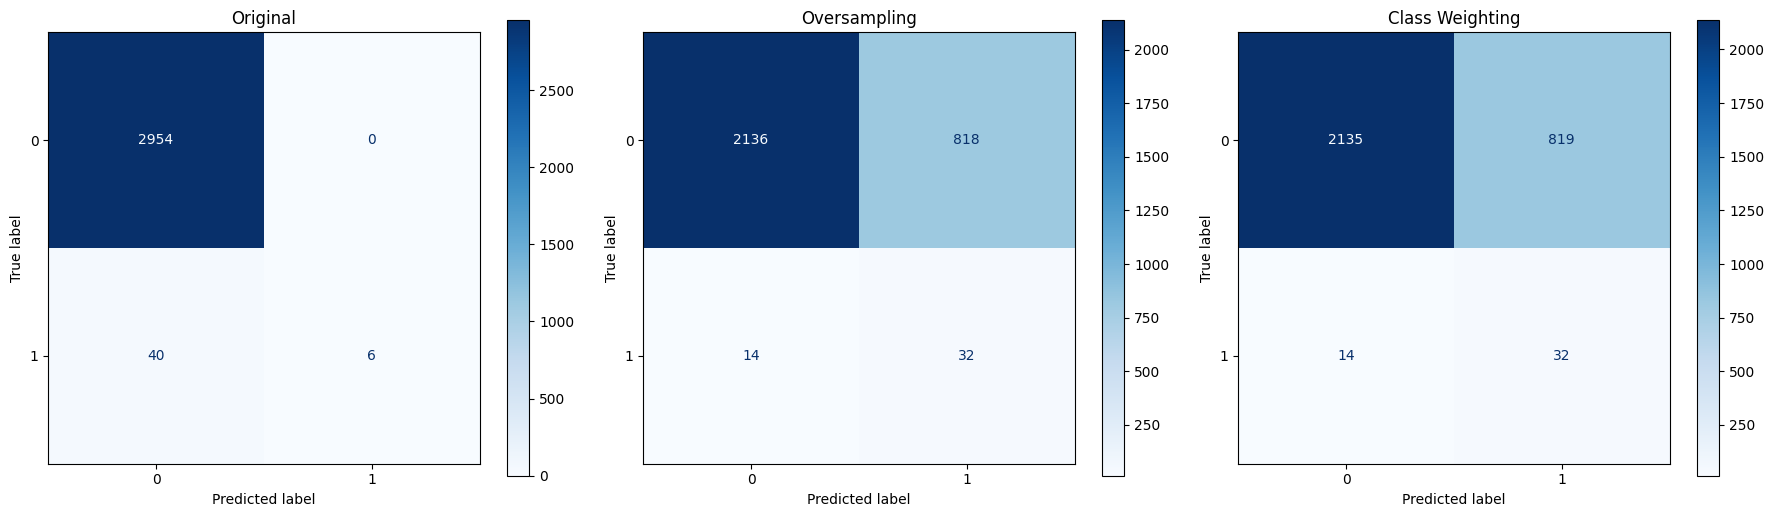

In [13]:
# Using class weighting
model_weighted = LogisticRegression(max_iter=1000, class_weight='balanced')
model_weighted.fit(X_train, y_train)
y_pred_weighted = model_weighted.predict(X_test)

# Calculate metrics with class weighting
metrics_weighted = {
    "Accuracy": accuracy_score(y_test, y_pred_weighted),
    "Precision": precision_score(y_test, y_pred_weighted),
    "Recall": recall_score(y_test, y_pred_weighted),
    "F1": f1_score(y_test, y_pred_weighted),
    "ROC AUC": roc_auc_score(y_test, model_weighted.predict_proba(X_test)[:, 1])
}

print("\nMetrics With Class Weighting:")
print(pd.DataFrame([metrics_weighted]))

# Plot comparison
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
pd.DataFrame([metrics]).plot(kind='bar', ax=ax[0], title='Original')
pd.DataFrame([metrics_ros]).plot(kind='bar', ax=ax[1], title='Oversampling')
pd.DataFrame([metrics_weighted]).plot(kind='bar', ax=ax[2], title='Class Weighting')
for a in ax:
    a.set_ylim(0, 1.1)
    a.set_xticklabels([])
plt.show()

# Confusion matrix comparison
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax[0], cmap='Blues')
ax[0].set_title('Original')
ConfusionMatrixDisplay.from_estimator(model_ros, X_test, y_test, ax=ax[1], cmap='Blues')
ax[1].set_title('Oversampling')
ConfusionMatrixDisplay.from_estimator(model_weighted, X_test, y_test, ax=ax[2], cmap='Blues')
ax[2].set_title('Class Weighting')
plt.tight_layout()
plt.show()

### Links
https://machinelearningmastery.com/bagging-and-random-forest-for-imbalanced-classification/
https://imbalanced-learn.org/stable/auto_examples/index.html#general-examples


In [ ]:

# Resouces